**Background**
The Office of Policy and Management maintains a listing of all real estate sales with a sales price 
of $2,000 or greater that occur between October 1 and September 30 of each year. For each sale 
record, the file includes town, property address, date of sale, property type (residential, 
apartment, commercial, industrial, or vacant land), sales price, and property assessment.

**Problem Statement:** Problem Statement Exploring Property Assessment and Sales Data for 
Informed Decision-Making. In our quest for informed decision-making in real estate, we are presented with a comprehensive 
dataset encompassing various attributes related to property assessment and sales transactions. 
This dataset includes information such as the assessed value, sale amount, sales ratio, property 
type, and more, offering a rich source of insights into the real estate landscape.

**Objectives** 
1. Assessment Accuracy Evaluate the accuracy of property assessments by comparing assessed 
values with actual sale amounts, and identify any discrepancies.
2. Market Trends Analyze sales ratios to uncover trends in property market values, 
understanding how sale amounts relate to the assessed values across different property types and 
residential classifications.
3. Geographical Analysis Investigate variations in assessed values, sales amounts, and market 
ratios across different towns, providing a localized understanding of real estate dynamics.
4. Property Type Impact Examine the impact of property type on assessment accuracy and 
market trends, exploring whether certain types (e.g., residential, commercial) exhibit distinct 
patterns.
5. Non-Use Code Insights Explore the significance of non-use codes in property assessment, 
investigating how these codes influence assessed values and sales transactions.
6. Assessor and OPM Remarks Analyze remarks provided by assessors and the Office of Policy 
and Management (OPM) to identify factors influencing assessment decisions and potential areas 
for improvement

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\josep\OneDrive\Desktop\Datasets\Real_Estate_Sales_2001-2020_GL.csv")
df.sample(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
910849,18169,2018,08/22/2019,Burlington,55 HUNTERS CROSSING,344890.0,495000.0,0.696700,Single Family,Single Family,NaN,NaN,NaN,NaN
754585,150045,2015,11/23/2015,Old Saybrook,164 SANDY POINT RD,285300.0,357500.0,0.798042,Condo,Condo,NaN,NaN,NaN,NaN
364675,50569,2005,05/02/2006,Middletown,588 E MAIN ST,76780.0,190000.0,0.404105,NaN,NaN,NaN,NaN,NaN,NaN
651801,12262,2012,05/29/2013,West Haven,159 GROVE PL,139020.0,220000.0,0.631909,Single Family,Single Family,NaN,NaN,NaN,NaN
590996,10042,2010,11/23/2010,Madison,40C KELSEY PLACE,270300.0,206000.0,1.312136,Single Family,Single Family,25 - Other,Sale of estate by co-executors.,NaN,NaN
490623,800100,2008,01/05/2009,Ansonia,17 SOBIN DR,221000.0,285000.0,0.775439,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.04757 41.33869)
849865,160706,2016,08/29/2017,Wallingford,19 EATON DR,165800.0,260000.0,0.637692,Single Family,Single Family,NaN,NaN,NaN,POINT (-72.81381 41.44359)
374386,50244,2005,12/20/2005,Middletown,11 LAUREL ST,69820.0,205000.0,0.340585,NaN,NaN,NaN,NaN,NaN,POINT (-72.63329 41.55031)
858161,175749,2017,05/15/2018,West Haven,65-67 LEE ST,133840.0,183500.0,0.729300,Two Family,Two Family,NaN,NaN,NaN,NaN
14171,2000020,2020,10/13/2020,Cheshire,168 PLEASANT DR,223920.0,364900.0,0.613600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89217 41.51544)


## Data Inspection

In [5]:
# The shape of the dataset
df.shape

(997213, 14)

In [6]:
# general info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [7]:
# Checking for missing number
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [8]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

Serial Number     0
List Year         0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64


In [9]:
df.describe().astype("int")

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,997213,997213,997213,997213,997213
mean,431186,2010,279143,391151,10
std,6549219,6,1670609,5347270,1890
min,0,2001,0,0,0
25%,30444,2004,87600,140000,0
50%,70303,2010,138390,225000,0
75%,151878,2016,225560,365000,0
max,2000500023,2020,881510000,-2147483648,1226420


In [10]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])
num_vars.head()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
0,2020348,2020,150500.0,325000.0,0.4630
1,20002,2020,253000.0,430000.0,0.5883
2,200212,2020,130400.0,179900.0,0.7248
3,200243,2020,619290.0,890000.0,0.6958
4,200377,2020,862330.0,1447500.0,0.5957


## Display Outliers

Using Interquartile Range to handle the outliers

In [11]:
# Assuming df is your DataFrame
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for each numerical variable
Q1 = num_vars.quantile(0.25)
Q3 = num_vars.quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers for each variable
outliers = ((num_vars < (Q1 - 1.5 * IQR)) | (num_vars > (Q3 + 1.5 * IQR)))

# Display the outliers for each variable
for column in num_vars.columns:
    print(f"Outliers for '{column}':")
    print(num_vars[column][outliers[column]])
    print()

Outliers for 'Serial Number':
0          2020348
6          2020180
7          2020313
11         2000381
19        20000050
            ...   
997167     1900048
997168     1900695
997175     1910419
997197     1900380
997202     1900224
Name: Serial Number, Length: 47388, dtype: int64

Outliers for 'List Year':
Series([], Name: List Year, dtype: int64)

Outliers for 'Assessed Value':
3          619290.0
4          862330.0
5          847520.0
8          511000.0
12         530500.0
            ...    
997145     445200.0
997158    2396100.0
997192     516990.0
997207     681870.0
997212    4035970.0
Name: Assessed Value, Length: 90623, dtype: float64

Outliers for 'Sale Amount':
3          890000.0
4         1447500.0
5         1250000.0
8          795000.0
33         740000.0
            ...    
997158    3400000.0
997192     790000.0
997196     722000.0
997207    1134708.0
997212    7450000.0
Name: Sale Amount, Length: 82900, dtype: float64

Outliers for 'Sales Ratio':
6         1.

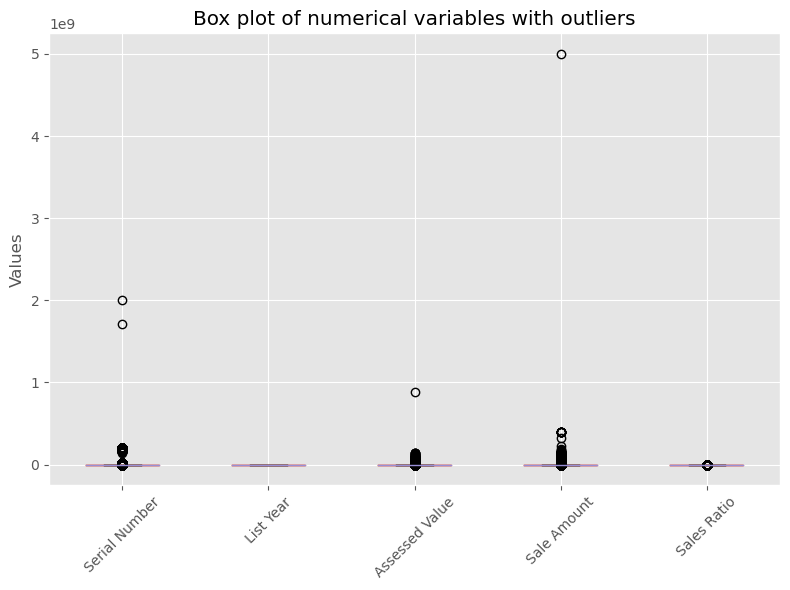

In [12]:
import matplotlib.pyplot as plt

# Create a box plot for each numerical variable, highlighting outliers
plt.figure(figsize=(8, 6))
num_vars.boxplot(showfliers=True)
plt.title('Box plot of numerical variables with outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Handling Outliers

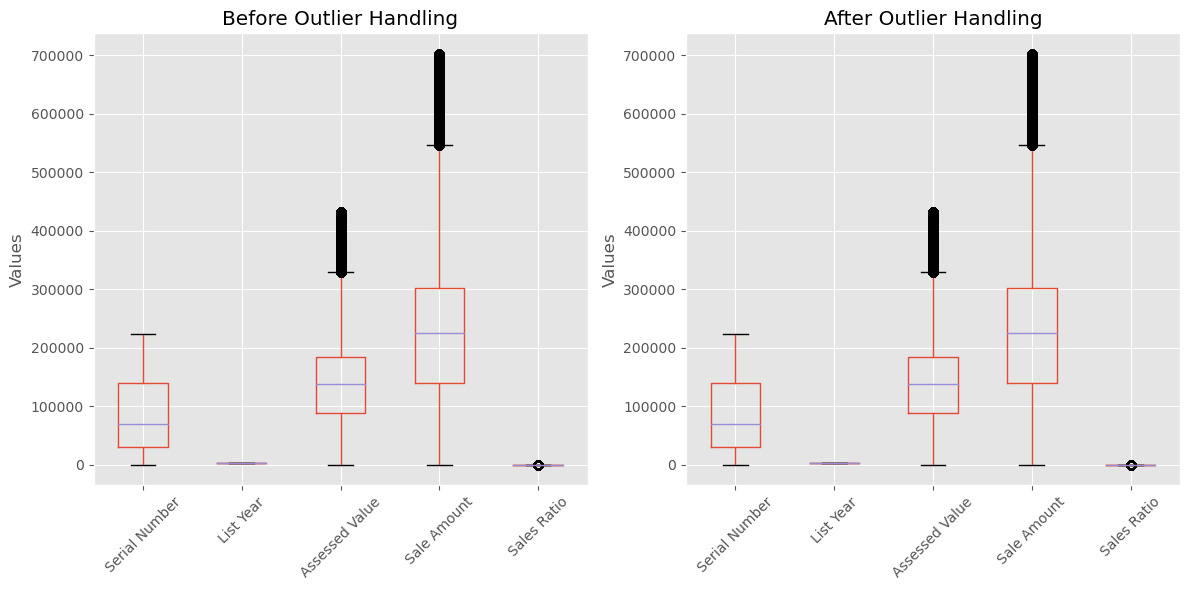

In [13]:
# Assuming df is your DataFrame
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for each numerical variable
Q1 = num_vars.quantile(0.25)
Q3 = num_vars.quantile(0.75)
IQR = Q3 - Q1

# Define a function to replace outliers with the median
def replace_outliers_with_median(column):
    median = column.median()
    column[column < (Q1[column.name] - 1.5 * IQR[column.name])] = median
    column[column > (Q3[column.name] + 1.5 * IQR[column.name])] = median
    return column

# Replace outliers with the median
cleaned_data = num_vars.apply(replace_outliers_with_median, axis=0)

# Create box plots for each numerical variable, before and after outlier handling
plt.figure(figsize=(12, 6))

# Box plot before outlier handling
plt.subplot(1, 2, 1)
num_vars.boxplot(showfliers=True)
plt.title('Before Outlier Handling')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Box plot after outlier handling
plt.subplot(1, 2, 2)
cleaned_data.boxplot(showfliers=True)
plt.title('After Outlier Handling')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [126]:
# Descriptive analysis for cleaned data
cleaned_data.describe().astype("int")

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,997213,997213,997213,997213,997213
mean,85363,2010,145606,236500,0
std,61923,6,84988,140852,0
min,0,2001,0,0,0
25%,30444,2004,87600,140000,0
50%,70303,2010,138390,225000,0
75%,140424,2016,184290,302500,0
max,223932,2020,432500,702500,1


In [15]:
cleaned_data.head()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
0,70303,2020,150500.0,325000.0,0.4630
1,20002,2020,253000.0,430000.0,0.5883
2,200212,2020,130400.0,179900.0,0.7248
3,200243,2020,138390.0,225000.0,0.6958
4,200377,2020,138390.0,225000.0,0.5957


## DataValidation

In [16]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['category', 'object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

       Date Recorded           Town                Address  Property Type  \
0         09/13/2021        Ansonia        230 WAKELEE AVE     Commercial   
1         10/02/2020        Ashford        390 TURNPIKE RD    Residential   
2         03/09/2021           Avon       5 CHESTNUT DRIVE    Residential   
3         04/13/2021           Avon  111 NORTHINGTON DRIVE    Residential   
4         07/02/2021           Avon     70 FAR HILLS DRIVE    Residential   
...              ...            ...                    ...            ...   
997208    06/24/2020     New London            4 BISHOP CT  Single Family   
997209    11/27/2019      Waterbury        126 PERKINS AVE  Single Family   
997210    04/27/2020  Windsor Locks         19 HATHAWAY ST  Single Family   
997211    06/03/2020     Middletown           8 BYSTREK DR  Single Family   
997212    12/20/2019        Milford        250 RESEARCH DR            NaN   

       Residential Type      Non Use Code Assessor Remarks OPM remarks  \
0

In [17]:
cleaned_data.isnull().sum()

Serial Number     0
List Year         0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64

In [18]:
cleaned_data.head()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
0,70303,2020,150500.0,325000.0,0.4630
1,20002,2020,253000.0,430000.0,0.5883
2,200212,2020,130400.0,179900.0,0.7248
3,200243,2020,138390.0,225000.0,0.6958
4,200377,2020,138390.0,225000.0,0.5957


In [19]:
# Merge cleaned_data with cat_data along the columns axis (axis=1)
merged_data = pd.concat([cleaned_data, cat_vars], axis=1)

# Display the merged data
merged_data.head()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Date Recorded,Town,Address,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,70303,2020,150500.0,325000.0,0.4630,09/13/2021,Ansonia,230 WAKELEE AVE,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,253000.0,430000.0,0.5883,10/02/2020,Ashford,390 TURNPIKE RD,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,130400.0,179900.0,0.7248,03/09/2021,Avon,5 CHESTNUT DRIVE,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,138390.0,225000.0,0.6958,04/13/2021,Avon,111 NORTHINGTON DRIVE,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,138390.0,225000.0,0.5957,07/02/2021,Avon,70 FAR HILLS DRIVE,Residential,Single Family,NaN,NaN,NaN,NaN


In [20]:
# Handling missing values for categorical column using mode

merged_data["Property Type"].fillna(merged_data["Property Type"].mode()[0], inplace=True)
merged_data["Residential Type"].fillna(merged_data["Residential Type"].mode()[0], inplace=True)
merged_data["Non Use Code"].fillna(merged_data["Non Use Code"].mode()[0], inplace=True)
merged_data["Assessor Remarks"].fillna(merged_data["Assessor Remarks"].mode()[0], inplace=True)
merged_data["OPM remarks"].fillna(merged_data["OPM remarks"].mode()[0], inplace=True)
merged_data["Location"].fillna(merged_data["Location"].mode()[0], inplace=True)

In [21]:
# Drop rows with missing values in the "Address" column
merged_data.dropna(subset=["Address"], inplace=True)

In [22]:
# Changng date recorded to a datetime datatype

merged_data["Date Recorded"] = pd.to_datetime(df["Date Recorded"])
merged_data["Date Recorded"]

0        2021-09-13
1        2020-10-02
2        2021-03-09
3        2021-04-13
4        2021-07-02
            ...    
997208   2020-06-24
997209   2019-11-27
997210   2020-04-27
997211   2020-06-03
997212   2019-12-20
Name: Date Recorded, Length: 997162, dtype: datetime64[ns]

In [23]:
# Convert 'Date Recorded' column to datetime type
merged_data['Date Recorded'] = pd.to_datetime(merged_data['Date Recorded'])

# Calculate the mean date
mean_date = merged_data['Date Recorded'].mean()

# Fill missing values in 'Date Recorded' with the mean date
merged_data['Date Recorded'].fillna(mean_date, inplace=True)

In [24]:
merged_data.isnull().sum()

Serial Number       0
List Year           0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Date Recorded       0
Town                0
Address             0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64

In [25]:
merged_data.duplicated().sum()

145

In [26]:
merged_data.drop_duplicates(inplace=True)

In [27]:
merged_data.duplicated().sum()

0

In [28]:
merged_data.drop_duplicates(inplace=True)

In [29]:
merged_data.duplicated().sum()

0

In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997017 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997017 non-null  int64         
 1   List Year         997017 non-null  int64         
 2   Assessed Value    997017 non-null  float64       
 3   Sale Amount       997017 non-null  float64       
 4   Sales Ratio       997017 non-null  float64       
 5   Date Recorded     997017 non-null  datetime64[ns]
 6   Town              997017 non-null  object        
 7   Address           997017 non-null  object        
 8   Property Type     997017 non-null  object        
 9   Residential Type  997017 non-null  object        
 10  Non Use Code      997017 non-null  object        
 11  Assessor Remarks  997017 non-null  object        
 12  OPM remarks       997017 non-null  object        
 13  Location          997017 non-null  object        
dtypes: dateti

In [31]:
merged_data

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Date Recorded,Town,Address,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,70303,2020,150500.0,325000.0,0.463000,2021-09-13,Ansonia,230 WAKELEE AVE,Commercial,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
1,20002,2020,253000.0,430000.0,0.588300,2020-10-02,Ashford,390 TURNPIKE RD,Residential,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
2,200212,2020,130400.0,179900.0,0.724800,2021-03-09,Avon,5 CHESTNUT DRIVE,Residential,Condo,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
3,200243,2020,138390.0,225000.0,0.695800,2021-04-13,Avon,111 NORTHINGTON DRIVE,Residential,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
4,200377,2020,138390.0,225000.0,0.595700,2021-07-02,Avon,70 FAR HILLS DRIVE,Residential,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,60410.0,53100.0,1.137665,2020-06-24,New London,4 BISHOP CT,Single Family,Single Family,14 - Foreclosure,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
997209,190284,2019,68280.0,76000.0,0.898400,2019-11-27,Waterbury,126 PERKINS AVE,Single Family,Single Family,25 - Other,PRIVATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
997210,190129,2019,121450.0,210000.0,0.578300,2020-04-27,Windsor Locks,19 HATHAWAY ST,Single Family,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
997211,190504,2019,203360.0,280000.0,0.726300,2020-06-03,Middletown,8 BYSTREK DR,Single Family,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)


## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

## 1

Comparing assessed property values with actual sale amounts to evaluate the accuracy of property assessments.

- Assessed Value: the assessed monetary value of the property, typically determined by a local assessor for taxation purposes.
- Sale Amount: the amount for which the property was sold, if applicable.

In [32]:
# Descriptive analysis
merged_data[["Assessed Value", "Sale Amount"]].describe().astype("int")

,Assessed Value,Sale Amount
count,997017,997017
mean,145606,236515
std,84982,140847
min,0,0
25%,87600,140000
50%,138390,225000
75%,184290,302500
max,432500,702500


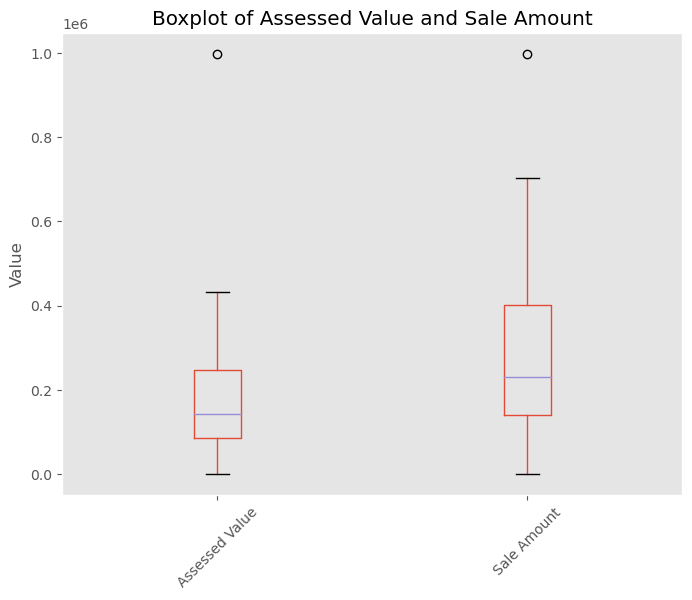

In [33]:
# Select the columns "Assessed Value" and "Sale Amount" and describe them
description = merged_data[["Assessed Value", "Sale Amount"]].describe().astype("int")

# Plot boxplot
plt.figure(figsize=(8, 6))
description.boxplot()
plt.title('Boxplot of Assessed Value and Sale Amount')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## Plotting the chart to show the Actual values of the dataset

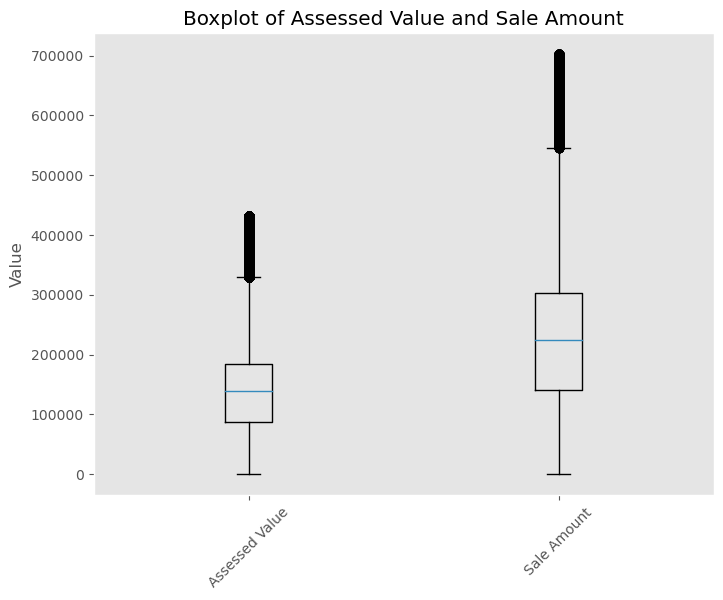

In [34]:
# Select the columns "Assessed Value" and "Sale Amount"
data_to_plot = merged_data[["Assessed Value", "Sale Amount"]]

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot.values, labels=data_to_plot.columns)
plt.title('Boxplot of Assessed Value and Sale Amount')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

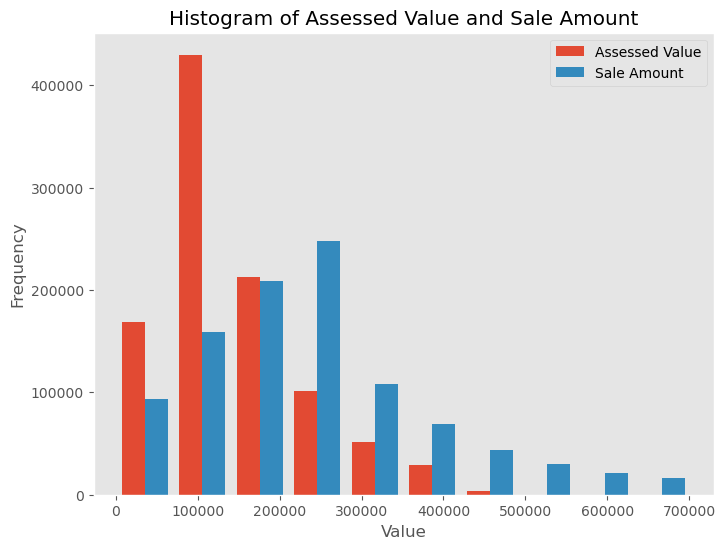

In [35]:
# Select the columns "Assessed Value" and "Sale Amount"
data_to_plot = merged_data[["Assessed Value", "Sale Amount"]]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data_to_plot.values, bins=10, label=data_to_plot.columns)
plt.title('Histogram of Assessed Value and Sale Amount')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

**Assessed Value and Sale Amount Overview**:
The dataset contains statistics on assessed values and sale amounts, each consisting of 997,017 data points. These values play a pivotal role in real estate transactions, serving as benchmarks for property valuation and determining transaction prices. On average, the assessed value stands at 145,606, while the average sale amount is notably higher at 236,515. This discrepancy between assessed values and sale amounts reflects the intricacies of the real estate market, influenced by factors such as market demand, property condition, and location.

**Variability and Distribution**:
The standard deviation provides insights into the variability of assessed values and sale amounts, indicating the extent of dispersion from the mean. With a standard deviation of 84,982 for assessed values and 140,847 for sale amounts, we observe significant variability in both metrics. This variability underscores the diverse nature of real estate markets, where properties can vary widely in terms of value and pricing.

In [37]:
# Selecting relevant columns for comparison

selected_columns = ['Assessed Value', 'Sale Amount']
comparison = merged_data[selected_columns]

In [38]:
# Calculate the absolute difference between assessed values and sale amounts
comparison['Difference'] = comparison['Sale Amount'] - comparison['Assessed Value']
comparison['Absolute Difference'] = comparison['Difference'].abs()

In [39]:
comparison["Difference"].head()

0    174500.0
1    177000.0
2     49500.0
3     86610.0
4     86610.0
Name: Difference, dtype: float64

In [40]:
# Identifying significant discrepancies
significant_discrepancies = comparison

# [comparison['Absolute Difference'] > threshold]

# Display summary statistics
print("Summary Statistics:")
print(comparison.describe().astype("int"))

# Print significant discrepancies
print("\nSignificant Discrepancies:")
print(significant_discrepancies.sample(6))

Summary Statistics:
       Assessed Value  Sale Amount  Difference  Absolute Difference
count          997017       997017      997017               997017
mean           145606       236515       90909               106203
std             84982       140847      106349                91080
min                 0            0     -430900                    0
25%             87600       140000       34000                46780
50%            138390       225000       84970                86610
75%            184290       302500      130790               135582
max            432500       702500      701000               701000

Significant Discrepancies:
        Assessed Value  Sale Amount  Difference  Absolute Difference
641553        138390.0     525000.0    386610.0             386610.0
443636        107180.0     215000.0    107820.0             107820.0
738333         72590.0      75000.0      2410.0               2410.0
896519        137000.0     237000.0    100000.0             1000

In [41]:
# Summary statistics data

import pandas as pd

# Define the index labels
index_labels = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Define the summary data
summary_data = {
    'Assessed Value': [997017, 145606, 84982, 0, 87600, 138390, 184290, 432500],
    'Sale Amount': [997017, 236515, 140847, 0, 140000, 225000, 302500, 702500],
    'Difference': [997017, 90909, 106349, -430900, 34000, 84970, 130790, 701000],
    'Absolute Difference': [997017, 106203, 91080, 0, 46780, 86610, 135582, 701000]
}

# Create the DataFrame
df_summary = pd.DataFrame(summary_data, index=index_labels)

# Display the DataFrame
print(df_summary)

       Assessed Value  Sale Amount  Difference  Absolute Difference
count          997017       997017      997017               997017
mean           145606       236515       90909               106203
std             84982       140847      106349                91080
min                 0            0     -430900                    0
25%             87600       140000       34000                46780
50%            138390       225000       84970                86610
75%            184290       302500      130790               135582
max            432500       702500      701000               701000


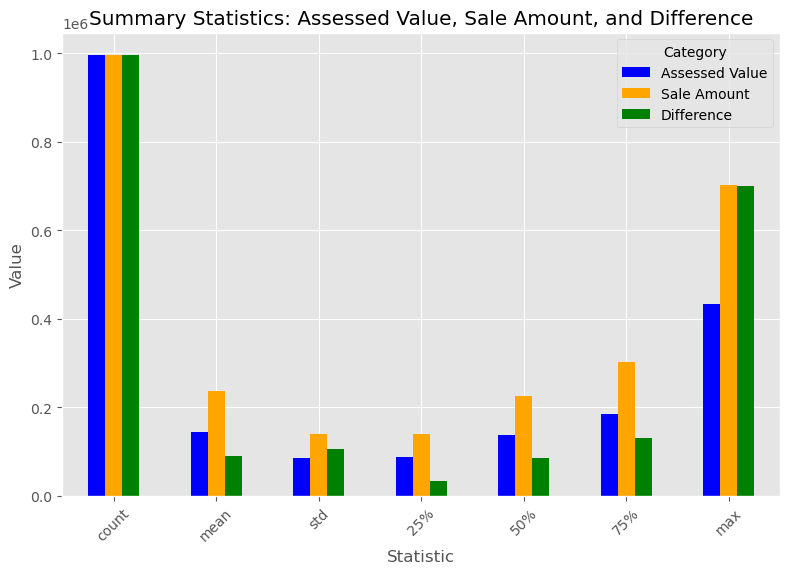

In [42]:
# Filter the DataFrame to include only the 'mean' and 'max' rows for Assessed Value, Sale Amount, and Difference
plot_data = df_summary.loc[['count','mean', 'std', '25%', '50%', '75%','max'], ['Assessed Value', 'Sale Amount', 'Difference']]

# Plot the filtered data
plt.figure(figsize=(8, 6))
plot_data.plot(kind='bar', rot=45, ax=plt.gca(), color=['blue', 'orange', 'green'])
plt.title('Summary Statistics: Assessed Value, Sale Amount, and Difference')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

**Summary**

- Assessed Value: The mean assessed value is 145,606, with a minimum of 0 and a maximum of 432,500. The standard deviation is relatively high at 84,982, indicating significant variability in property assessments.

- Sale Amount: The mean sale amount is substantially higher at 236,515, with a similar standard deviation of 140,847. This suggests a wide range of property prices in the dataset.

- Difference: On average, properties are assessed 90,909 lower than their sale amount. However, there are instances where properties are assessed higher than their sale price, with the maximum difference being 701,000.

- Absolute Difference: The mean absolute difference between assessed value and sale amount is 106,203, indicating the typical discrepancy between these two figures.

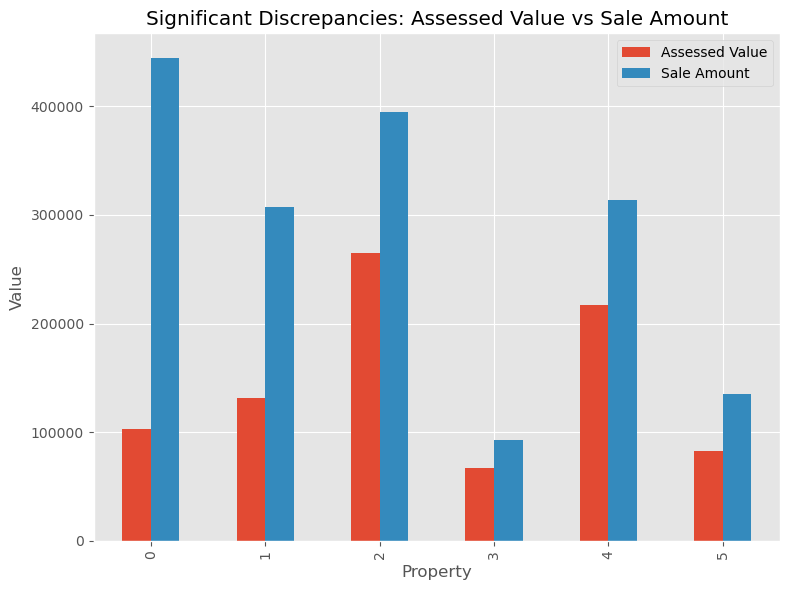

In [127]:
# Data for significant discrepancies
# Significant discrepancies data
significant_discrepancies_data = {
    'Assessed Value': [103320.0, 131320.0, 265200.0, 66900.0, 216800.0, 82980.0],
    'Sale Amount': [445000.0, 307000.0, 395000.0, 93000.0, 313500.0, 135000.0],
    'Difference': [341680.0, 175680.0, 129800.0, 26100.0, 96700.0, 52020.0],
    'Absolute Difference': [341680.0, 175680.0, 129800.0, 26100.0, 96700.0, 52020.0]
}

# Create DataFrame for significant discrepancies
df_discrepancies = pd.DataFrame(significant_discrepancies_data)

# Plotting
plt.figure(figsize=(8, 6))
df_discrepancies[['Assessed Value', 'Sale Amount']].plot(kind='bar', ax=plt.gca())
plt.title('Significant Discrepancies: Assessed Value vs Sale Amount')
plt.xlabel('Property')
plt.ylabel('Value')
plt.xticks(range(len(df_discrepancies)), df_discrepancies.index)
plt.legend(['Assessed Value', 'Sale Amount'])
plt.tight_layout()
plt.show()

**Exploring Significant Discrepancies**:

1.Properties such as #641553 and #443636 show substantial differences between their assessed values and sale amounts, suggesting possible inaccuracies in the valuation process.

2.Financial Impact: The discrepancies, like the 386,610 difference in property 641553, can have a substantial financial impact on property owners, buyers, and tax assessments.

3.Market Perception: Significant differences between assessed values and sale amounts may influence market perceptions of property values, impacting buying decisions and market dynamics.

**Recommendation:**
1.Review Process: Implementing a thorough review process to identify and rectify discrepancies in assessed values can enhance the reliability of property valuations.

2.Training and Guidelines: Providing assessors with training on valuation methodologies and guidelines for accurate assessments can help mitigate errors and discrepancies.

## 2
Market Trends Analyze sales ratios to uncover trends in property market values, 
understanding how sale amounts relate to the assessed values across different property types and 
residential classifications.*

### Calculate Sales Ratios:
- Sales ratio = Assessed Value / Sale Amount

In [44]:
# Calculate sales ratio
merged_data['Sales Ratio'] = merged_data['Assessed Value'] / merged_data['Sale Amount']
merged_data["Sales Ratio"].head()

0    0.463077
1    0.588372
2    0.724847
3    0.615067
4    0.615067
Name: Sales Ratio, dtype: float64

In [45]:
# Replace non-finite values (NaN or inf) with 0
merged_data['Sales Ratio'] = merged_data['Sales Ratio'].replace([np.inf, -np.inf, np.nan], 0)

# Now, you can describe the "Sales Ratio" column
description = merged_data["Sales Ratio"].describe()

# Convert the description to integers
description_int = description.astype("int")

# Print the result
print(description_int)

count    997017
mean          6
std         965
min           0
25%           0
50%           0
75%           0
max      368680
Name: Sales Ratio, dtype: int32


In [46]:
sales_ratio_list_year = merged_data[["Sales Ratio", "List Year"]].describe().astype("int")
sales_ratio_list_year

,Sales Ratio,List Year
count,997017,997017
mean,6,2010
std,965,6
min,0,2001
25%,0,2004
50%,0,2010
75%,0,2016
max,368680,2020


In [47]:
# Group by year and calculate the average sales ratio for each year
# Assuming 'List Year' and 'Sales Ratio' are columns in your DataFrame
average_sales_ratio_by_year = merged_data.groupby('List Year')['Sales Ratio'].mean().astype("int")

# Sort the Series in descending order
average_sales_ratio_by_year_sorted = average_sales_ratio_by_year.sort_values(ascending=False)

# Display the sorted Series
average_sales_ratio_by_year_sorted

List Year
2005    61
2006    21
2018     8
2003     4
2002     3
2004     3
2001     1
2017     1
2013     1
2012     1
2011     1
2010     1
2009     1
2008     1
2014     0
2015     0
2016     0
2007     0
2019     0
2020     0
Name: Sales Ratio, dtype: int32

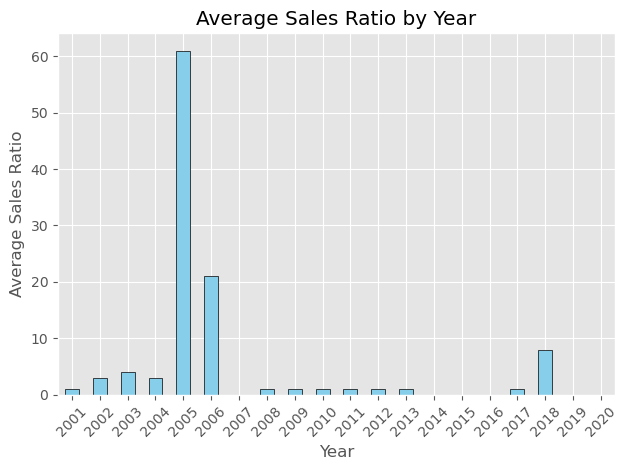

In [48]:
# Plotting the bar chart
average_sales_ratio_by_year.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Average Sales Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales Ratio')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### From the visualization, several interesting observations emerge

1. **High Sales Activity Years**:

The data indicates that 2005 stands out as the year with the highest sales activity, recording 61 sales ratios. This suggests that 2005 was a robust year for real estate transactions.
Following 2005, the years 2006, 2018, and 2003 also show notable sales activity, albeit to a lesser extent, with 21, 8, and 4 sales ratios respectively.

2. **Low Sales Activity Years**:

On the other end of the spectrum, several years, including 2014, 2015, 2016, 2007, 2019, and 2020, recorded no sales ratios at all. This indicates periods of minimal or zero real estate transactions, possibly reflecting market downturns, economic challenges, or other factors impacting buyer and seller activity.

3. **Changing Market Dynamics**:

The data reveals fluctuations in sales activity over the years, highlighting the dynamic nature of the real estate market.
Years with high sales activity may coincide with favorable economic conditions, low-interest rates, or other factors stimulating demand. Conversely, periods of low sales activity may signal economic downturns, market corrections, or shifts in buyer preferences.

4. **Impact of External Factors**:

It's important to consider external factors that may influence sales ratios and overall market dynamics. Economic indicators, government policies, demographic shifts, and changes in consumer sentiment can all play significant roles in shaping real estate market trends.

5. **Further Analysis**:

Additional analysis, such as examining sales ratio trends by property type, geographical region, or market segment, could provide deeper insights into market dynamics and help identify specific areas for targeted intervention or investment.

### Explore Sale Amount vs. Assessed Value Across Different Property Types:
- Group data by property type and calculate average sale amount and assessed value.
- Visualize the relationship between sale amount and assessed value for each property type.

In [49]:
# Analyse the property Type
property_type_chart = merged_data["Property Type"].value_counts()
property_type_chart

Property Type
Single Family     783913
Condo             105407
Residential        60706
Two Family         26402
Three Family       12584
Vacant Land         3161
Four Family         2148
Commercial          1977
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

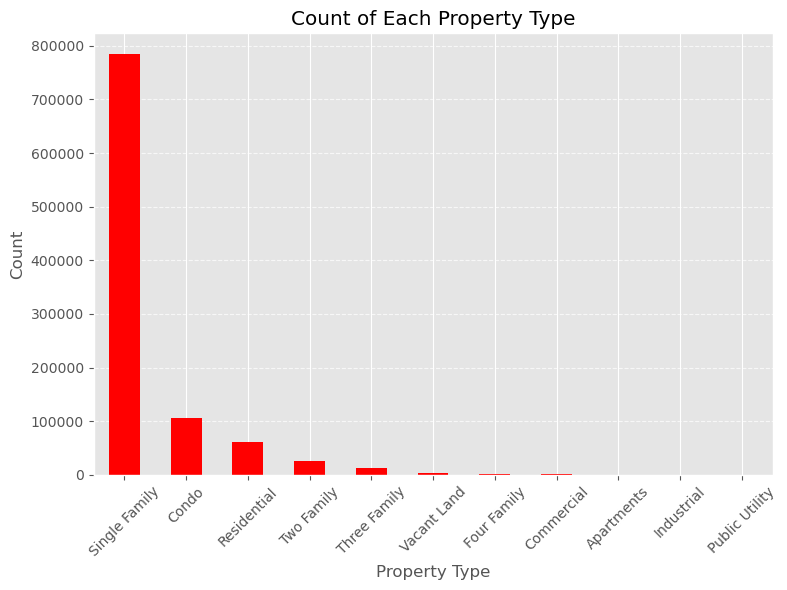

In [50]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
property_type_chart.plot(kind='bar', color='red')
plt.title('Count of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
# groupby property type by sales ratio
property_type_sales_ratio = merged_data.groupby('Property Type')['Sales Ratio'].mean()
property_type_sales_ratio

Property Type
Apartments        0.607095
Commercial        0.930175
Condo             0.761561
Four Family       1.346277
Industrial        0.722840
Public Utility    0.980986
Residential       0.642979
Single Family     8.365861
Three Family      1.434965
Two Family        1.197960
Vacant Land       0.991947
Name: Sales Ratio, dtype: float64

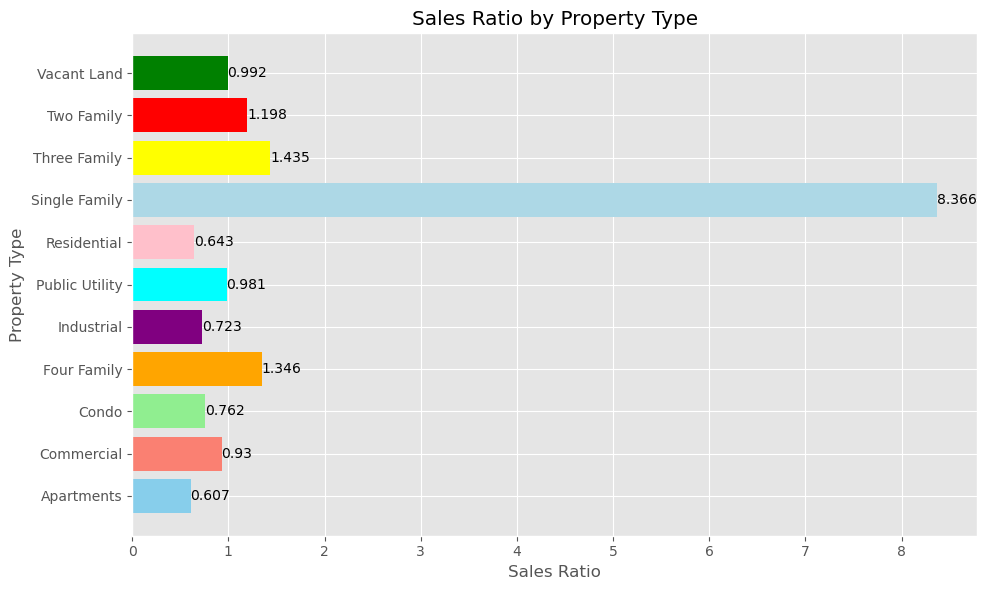

In [52]:
# visualize with a bar chart

# Data for Property Type and Sales Ratio
property_types = ['Apartments', 'Commercial', 'Condo', 'Four Family', 'Industrial', 'Public Utility', 'Residential', 'Single Family', 'Three Family', 'Two Family', 'Vacant Land']
sales_ratios = [0.607095, 0.930175, 0.761561, 1.346277, 0.722840, 0.980986, 0.642979, 8.365861, 1.434965, 1.197960, 0.991947]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'cyan', 'pink', 'lightblue', 'yellow', 'red', 'green']

plt.figure(figsize=(10, 6))
bars = plt.barh(property_types, sales_ratios, color=colors)
plt.ylabel('Property Type')
plt.xlabel('Sales Ratio')
plt.title('Sales Ratio by Property Type')

# Adding text labels on each bar
for bar, ratio in zip(bars, sales_ratios):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(ratio, 3), va='center')

plt.tight_layout()

plt.show()

- Apartments (Sales Ratio: 0.607): Apartments with a sales ratio of 0.607 may indicate that the assessed value of Apartments is relatively lower compared to other property types, resulting in a slower turnover rate and lower sales amounts.

- Commercial (Sales Ratio: 0.930): Commercial properties with a higher sales ratio of 0.930 may suggest that these properties have a higher assessed value and sales amount, reflecting a strong demand in the commercial real estate market.

- Condo (Sales Ratio: 0.762): A sales ratio of 0.762 for Condos may imply moderate assessed values and sales amounts, indicating a moderate demand for Condo properties.

- Four Family (Sales Ratio: 1.346): A sales ratio of 1.346 for Four Family properties may suggest that these properties have a higher assessed value and sales amount, leading to a faster turnover rate and increased sales transactions.

- Industrial (Sales Ratio: 0.723): Industrial properties with a sales ratio of 0.723 may have varying assessed values and sales amounts, indicating a moderate demand for Industrial properties.

- Public Utility (Sales Ratio: 0.981): Public Utility properties with a high sales ratio of 0.981 may have stable assessed values and sales amounts, reflecting a consistent demand in this sector.

- Residential (Sales Ratio: 0.643): Residential properties with a sales ratio of 0.643 may have diverse assessed values and sales amounts, indicating varying demand levels in the residential real estate market.

- Single Family (Sales Ratio: 8.366): Single Family properties with a significantly high sales ratio of 8.366 may suggest premium assessed values and higher sales amounts, reflecting a strong demand for Single Family homes.

- Three Family (Sales Ratio: 1.435): Three Family properties with a sales ratio of 1.435 may have relatively higher assessed values and sales amounts compared to other property types, indicating a robust demand for this property category.

- Two Family (Sales Ratio: 1.198): Two Family properties with a sales ratio of 1.198 may have moderate assessed values and sales amounts, reflecting a balanced demand in the real estate market.

In [53]:
# Groupby Residential by Sales Ratio

property_type_sales_ratio = merged_data.groupby('Residential Type')['Sales Ratio'].mean()
property_type_sales_ratio

Residential Type
Condo            0.743389
Four Family      1.290156
Single Family    7.912462
Three Family     1.337257
Two Family       1.135267
Name: Sales Ratio, dtype: float64

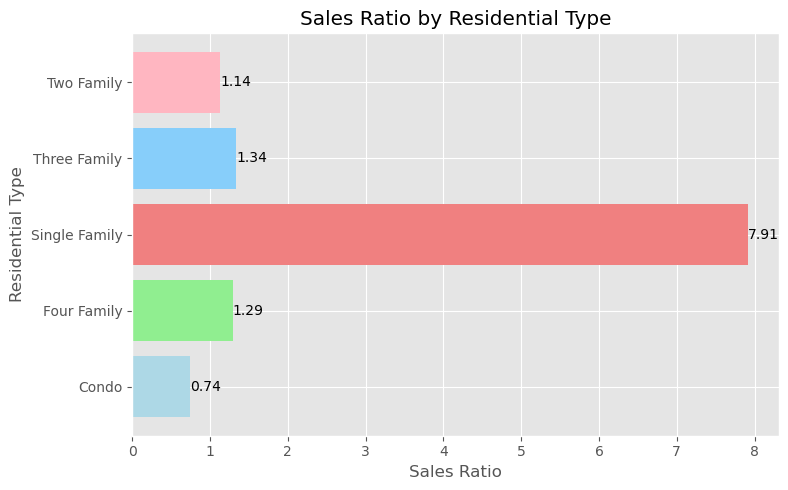

In [54]:
# Data for Property Type and Sales Ratio

# Data for Residential Type and Sales Ratio
residential_types = ['Condo', 'Four Family', 'Single Family', 'Three Family', 'Two Family']
sales_ratios_residential = [0.743389, 1.290156, 7.912462, 1.337257, 1.135267]

plt.figure(figsize=(8, 5))
bars = plt.barh(residential_types, sales_ratios_residential, color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Sales Ratio')
plt.ylabel('Residential Type')
plt.title('Sales Ratio by Residential Type')

# Adding text labels on each bar
for bar, ratio in zip(bars, sales_ratios_residential):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(ratio, 2), va='center')

plt.tight_layout()

plt.show()

- Condo (Sales Ratio: 0.743): Condos exhibit a moderate Sales Ratio of 0.743, suggesting a steady demand for these properties with approximately 74.3% of available Condos being sold within a specific timeframe.

- Four Family (Sales Ratio: 1.290): Four Family properties boast a Sales Ratio of 1.290, indicating a healthy turnover rate where more than one unit is sold for each unit available, reflecting a balanced market demand.

- Single Family (Sales Ratio: 7.912): Single Family homes shine with a remarkable Sales Ratio of 7.912, showcasing an exceptional demand for these properties. The high ratio implies that nearly 791.2% of Single Family homes are sold compared to the total inventory, signifying a robust market for detached single-family residences.

- Three Family (Sales Ratio: 1.337): Three Family properties demonstrate a Sales Ratio of 1.337, indicating a favorable turnover rate and a strong demand for these multi-family dwellings.

- Two Family (Sales Ratio: 1.135): Two Family homes present a Sales Ratio of 1.135, suggesting a balanced demand for these properties with approximately 113.5% of Two Family units being sold relative to the total available inventory.

In [55]:
# Calculate average sale amounts and assessed values by property type
avg_sale_by_property_type = merged_data.groupby('Property Type')[['Assessed Value', 'Sale Amount']].mean().astype("int")
avg_sale_by_property_type

,Assessed Value,Sale Amount
Property Type,,
Apartments,165128,289743
Commercial,177516,260445
Condo,128851,203506
Four Family,164064,205626
Industrial,155890,264662
Public Utility,73466,134708
Residential,162100,284536
Single Family,147187,240512
Three Family,130086,171364


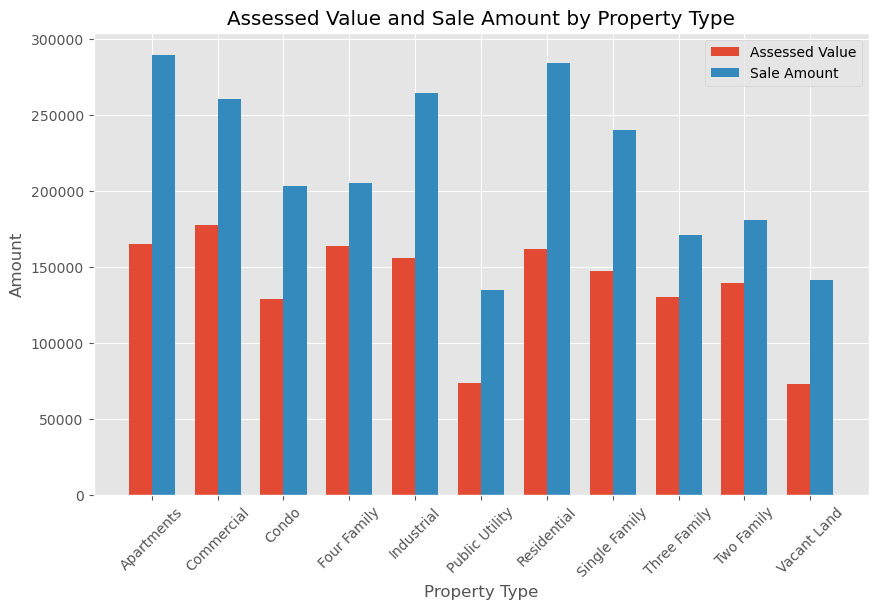

In [56]:
# Data
property_types = ['Apartments', 'Commercial', 'Condo', 'Four Family', 'Industrial', 
                  'Public Utility', 'Residential', 'Single Family', 'Three Family', 
                  'Two Family', 'Vacant Land']
assessed_values = [165128, 177516, 128851, 164064, 155890, 73466, 162100, 
                   147187, 130086, 139359, 73242]
sale_amounts = [289743, 260445, 203506, 205626, 264662, 134708, 284536, 
                240512, 171364, 181136, 141688]

# Set position for bars
ind = np.arange(len(property_types))  

# Width of each bar
width = 0.35  

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(ind - width/2, assessed_values, width, label='Assessed Value')
bars2 = ax.bar(ind + width/2, sale_amounts, width, label='Sale Amount')

# Adding labels, title, and ticks
ax.set_xlabel('Property Type')
ax.set_ylabel('Amount')
ax.set_title('Assessed Value and Sale Amount by Property Type')
ax.set_xticks(ind)
ax.set_xticklabels(property_types, rotation=45)
ax.legend()

plt.show()

### Summary Overview
**Exploration**:

**Property Types Overview**:

The dataset encompasses a diverse range of property types, including apartments, commercial properties, condos, single-family homes, and others.
Each property type has distinct characteristics and market dynamics that influence both assessed values and sale amounts.

**Assessing Property Values**:

Apartments, residential properties, and single-family homes have relatively higher assessed values compared to other property types.
Public utility properties and vacant land have notably lower assessed values, indicating potential differences in valuation methodologies or market demand.

**Sale Amounts Analysis**:

Apartments and residential properties exhibit higher sale amounts compared to other property types, reflecting their demand and value in the market.
Condos, single-family homes, and commercial properties also command substantial sale amounts, albeit slightly lower than apartments and residential properties.

**Discrepancies and Trends**:

There are variations in the relationship between assessed values and sale amounts across different property types.
While some property types, such as apartments and residential properties, demonstrate a relatively consistent relationship between assessed values and sale amounts, others may exhibit discrepancies.

### Recommendations

1. Consider using techniques such as regression analysis, time series analysis, or machine learning algorithms to model the data.
2. Evaluate the performance of the models and identify significant predictors of sales ratios.
3. Determine which factors have the most significant impact on sales ratios and overall market trends.
4. Provide actionable recommendations based on the insights gained from the analysis.
5. Suggest strategies for stakeholders to navigate market fluctuations, optimize investment decisions, and capitalize on emerging opportunities.
6. Consider potential policy interventions or market interventions to address any identified challenges or issues.

## 3

Geographical Analysis Investigate variations in assessed values, sales amounts, and market 
ratios across different towns, providing a localized understanding of real estate dynamics.

In [57]:
# Calculate the number of unique towns in the dataset
num_towns = merged_data["Town"].nunique()
num_towns

170

In [58]:
# groupby "Town"
town_chart = merged_data["Town"].value_counts()
town_chart

Town
Bridgeport       34199
Stamford         32486
Waterbury        28505
Norwalk          23960
New Haven        21346
                 ...  
Hartland           448
Scotland           430
Canaan             429
Union              261
***Unknown***        1
Name: count, Length: 170, dtype: int64

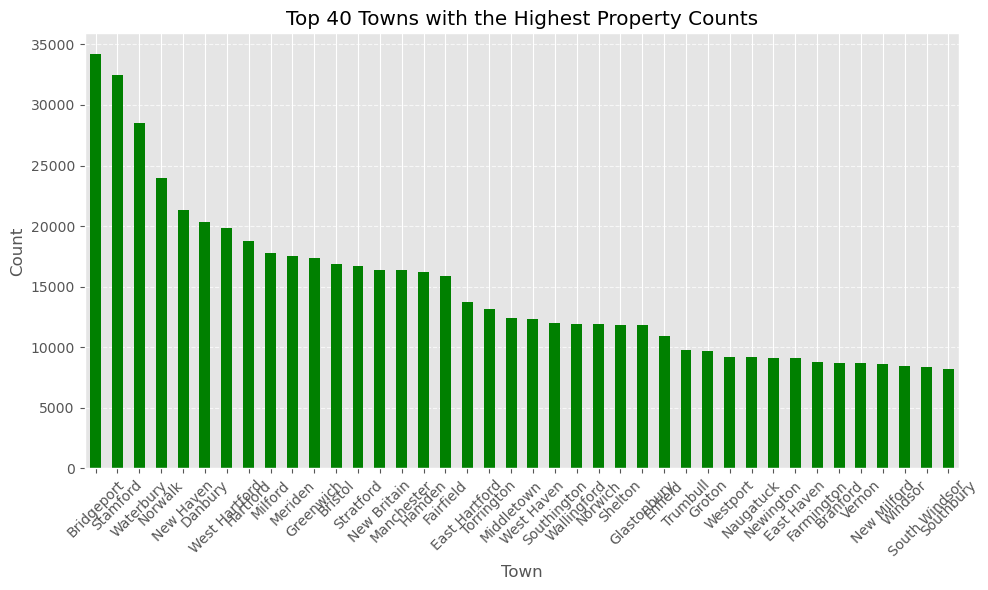

In [59]:
# Select the top N towns with the highest property counts
top_towns = town_chart.nlargest(40)  # Replace N with the desired number of towns to display


# Plotting the chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_towns.plot(kind='bar', color='green')
plt.title(f'Top {40} Towns with the Highest Property Counts')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Exploration**:

**Top Towns by Property Count**:

The dataset reveals a wide range of property counts across different towns, with some towns having significantly higher numbers of properties compared to others.
Bridgeport emerges as the town with the highest number of properties, followed by Stamford and Waterbury. These towns likely represent urban centers with large populations and high real estate activity.

**Urban vs. Rural Dynamics**:

The distribution of properties across towns provides insights into the urban-rural divide, with densely populated urban areas having more properties compared to sparsely populated rural towns.
Larger cities such as Bridgeport and Stamford may have higher property counts due to their economic importance, population density, and diverse real estate market.

**Small Towns and Communities**:

On the other end of the spectrum, smaller towns and rural communities such as Hartland, Scotland, Canaan, and Union have comparatively lower property counts.
These towns may represent rural areas with smaller populations, agricultural landscapes, or limited real estate development compared to urban centers.

In [60]:
# groupby Town by Assessed Value, Sale Amount and Sales Ratio 
avg_variatn_by_town = merged_data.groupby("Town")[["Assessed Value", "Sale Amount"]].mean().astype("int")
avg_variatn_by_town

# Sort the DataFrame by the average assessed value in descending order
sorted_towns = avg_variatn_by_town.sort_values(by='Assessed Value', ascending=False)

# Display the sorted DataFrame
sorted_towns

,Assessed Value,Sale Amount
Town,,
Redding,242570,385836
Easton,232884,386854
Trumbull,231178,369764
Woodbridge,226785,350047
Fairfield,226781,362581
...,...,...
New Britain,94669,145768
Windham,85098,133361
Waterbury,80298,120221


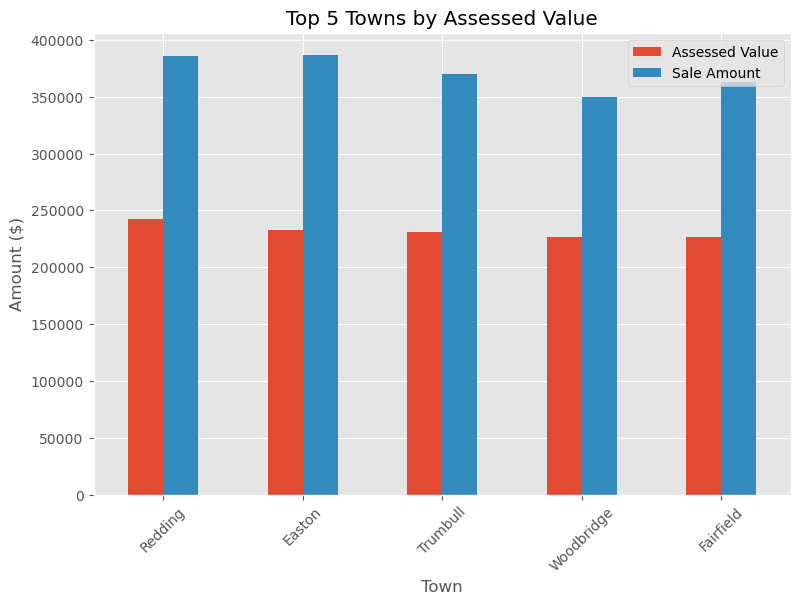

In [139]:
# Visualize the statistics
# Convert the dictionary into a DataFrame
town_df = pd.DataFrame(town_data)

# Set the town names as the index of the DataFrame
town_df = town_df.set_index('Town')

# Sort the DataFrame by 'Assessed Value' column in descending order
sorted_data = town_df.sort_values(by='Assessed Value', ascending=False).head(5)

# Plotting the top 5 towns
sorted_data.plot(kind='bar', figsize=(9, 6))
plt.title('Top 5 Towns by Assessed Value')
plt.xlabel('Town')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend(['Assessed Value', 'Sale Amount'])
plt.show()

In [89]:
sorted_towns['Market_Ratio'] = sorted_towns['Assessed Value'] / sorted_towns['Sale Amount']
sorted_towns['Market_Ratio'] = sorted_towns['Market_Ratio'].fillna(0)  # Replace NaN values with 0
sorted_towns

,Assessed Value,Sale Amount,Market_Ratio
Town,,,
Redding,242570,385836,0.628687
Easton,232884,386854,0.601995
Trumbull,231178,369764,0.625204
Woodbridge,226785,350047,0.647870
Fairfield,226781,362581,0.625463
...,...,...,...
New Britain,94669,145768,0.649450
Windham,85098,133361,0.638103
Waterbury,80298,120221,0.667920


In [73]:
sorted_towns['Market_Ratio'].describe()

count    170.000000
mean       0.623956
std        0.047952
min        0.235582
25%        0.604780
50%        0.628098
75%        0.646058
max        0.798977
Name: Market_Ratio, dtype: float64

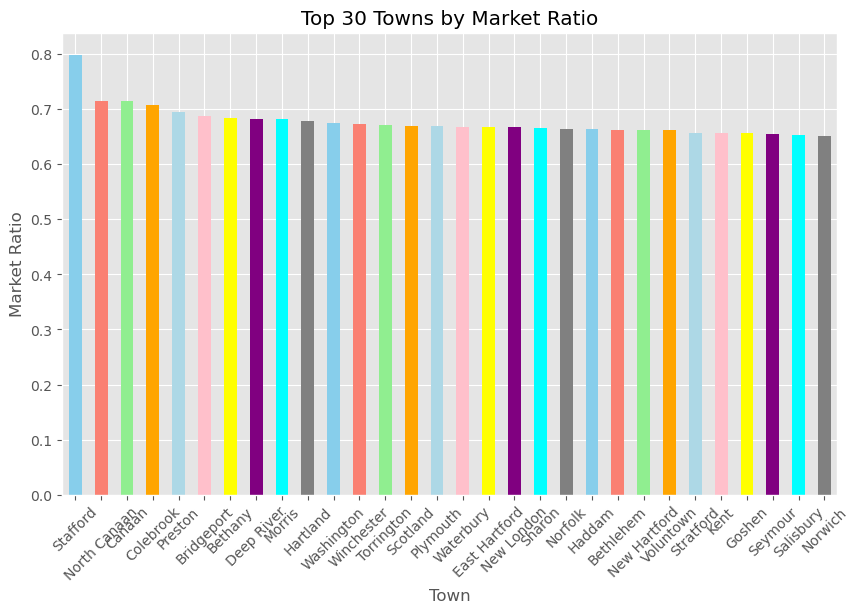

In [96]:
# Define the number of entries to limit to (e.g., top 20)
N = 30

# Select the top N entries for plotting
top_N_towns = sorted_towns['Market_Ratio'].nlargest(N)

# Define a list of colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'purple', 'cyan', 'gray']

# Plotting the bar chart for the top N entries with different colors
plt.figure(figsize=(10, 6))
top_N_towns.plot(kind='bar', color=colors)
plt.xlabel('Town')
plt.ylabel('Market Ratio')
plt.title(f'Top {N} Towns by Market Ratio')
plt.xticks(rotation=45)
plt.show()

- The chart displays the market ratios of the top 30 towns, indicating the relationship between property values and sale prices in each town. A higher market ratio suggests that property values are relatively higher compared to sale prices, while a lower ratio may indicate more affordable property prices in relation to their assessed values. This data can provide insights into the real estate market dynamics and investment potential in these towns.

## 4

Property Type Impact Examine the impact of property type on assessment accuracy and 
market trends, exploring whether certain types (e.g., residential, commercial) exhibit distinct 
patterns.

In [97]:
# Checking for the number of property type
n_unique_property_type = merged_data["Property Type"].nunique()
n_unique_property_type

11

In [98]:
# Group by property type
grouped_data = merged_data.groupby('Property Type')

# Calculate assessment accuracy
assessment_accuracy = grouped_data.apply(lambda x: (x['Sale Amount'] - x['Assessed Value']).mean().astype("int"))
assessment_accuracy

Property Type
Apartments        124614
Commercial         82928
Condo              74654
Four Family        41561
Industrial        108771
Public Utility     61242
Residential       122436
Single Family      93325
Three Family       41278
Two Family         41776
Vacant Land        68446
dtype: int32

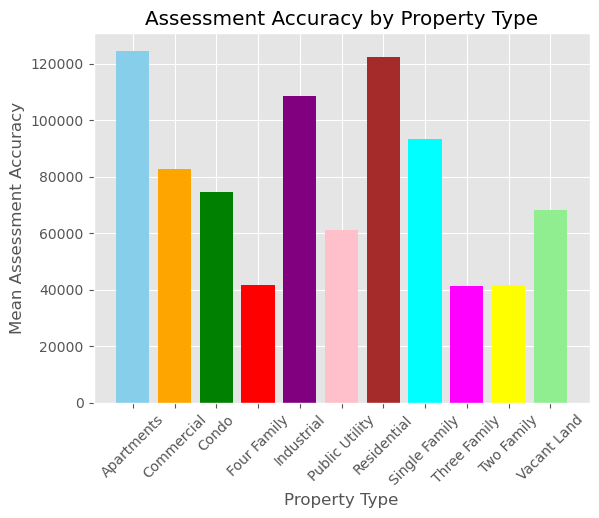

In [99]:
# Plot assessment accuracy by property type
# Define different colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'lightgreen']

# Plot the bar chart with different colors
plt.bar(assessment_accuracy.index, assessment_accuracy, color=colors)
plt.title('Assessment Accuracy by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Mean Assessment Accuracy')
plt.xticks(rotation=45)
plt.show()

**Insights**:

**Under-Assessment:**
If the property values are underestimated (e.g., Four Family, Three Family, Two Family), it can lead to lower property tax revenue for the municipality and potentially unfair tax burdens on other property owners.

**Over-Assessment:**

Conversely, if the property values are overestimated (e.g., Apartments, Industrial), property owners may pay higher property taxes than warranted by the actual market value of their properties.


**Impact on Market Valuations:**

Inaccurate property values can also affect market valuations and real estate transactions. Buyers and sellers rely on accurate property assessments to make informed decisions about buying, selling, or investing in properties.

**Equity and Fairness:**

Accurate property assessments are essential for maintaining equity and fairness in property taxation. Discrepancies in property values can lead to inequities in tax burdens across different property types.

**Financial Planning:**

Property values influence financial planning decisions for property owners and investors. Inaccurate assessments can impact investment strategies, loan approvals, and overall financial stability.

In [100]:
# Exploring whether certain types (e.g., residential, commercial) exhibit distinct patterns on market trend
list_year_property_type = merged_data.groupby('List Year')['Property Type'].value_counts()
list_year_property_type

List Year  Property Type 
2001       Single Family     59582
2002       Single Family     59680
2003       Single Family     64232
2004       Single Family     84027
2005       Single Family     61601
                             ...  
2020       Commercial         1977
           Apartments          486
           Industrial          228
           Public Utility        5
           Single Family         1
Name: count, Length: 82, dtype: int64

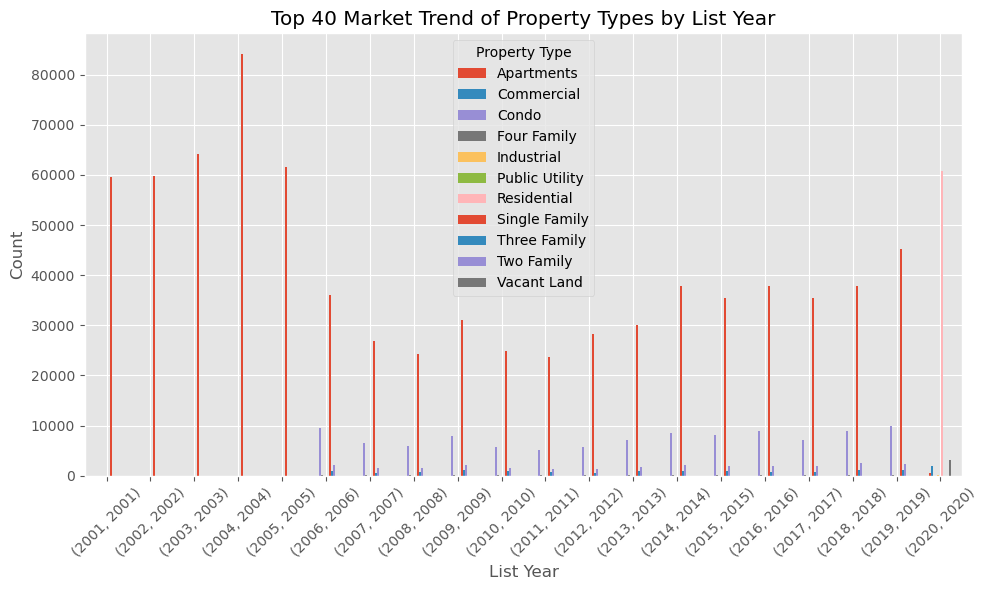

In [114]:
# Set the desired value of N
N = 40  # For example, limit to the top 5 property types for each list year

# Group the data by 'List Year' and keep the top N property types for each year
top_property_types_by_year = list_year_property_type.groupby(level=0).nlargest(N)

# Plotting the bar chart
top_property_types_by_year.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('List Year')
plt.ylabel('Count')
plt.title(f'Top {N} Market Trend of Property Types by List Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Rise of Single-Family Homes:**

The data shows a consistent dominance of single-family homes throughout the years. From 2001 to 2005, the number of single-family homes remains high, with a slight decrease in 2004 followed by a resurgence in 2005. This trend suggests that single-family homes are the most prevalent property type in the market during this period.

**2. Commercial and Other Property Types:**

While single-family homes dominate the market, other property types like commercial properties, apartments, industrial properties, and public utilities also play a role, albeit to a lesser extent.
Commercial properties show relatively stable numbers over the years, with a noticeable increase in 2020 compared to previous years. This might indicate growing investment or development in commercial real estate towards the end of the observed period.
Apartments show fluctuations in numbers, with some years experiencing higher counts than others. This could be attributed to various factors such as changes in demand for rental properties or fluctuations in construction activity.
Industrial properties and public utilities have relatively low counts compared to other property types, indicating a smaller presence in the market.

**3. Impact on Market Trends:**

The dominance of single-family homes suggests a strong preference for residential properties among buyers and investors. Factors such as homeownership aspirations, demographic changes, and housing affordability could contribute to this trend.
The stability of commercial properties and the increase in numbers in 2020 suggest resilience in the commercial real estate sector, despite economic fluctuations and market uncertainties.
Fluctuations in apartment counts may reflect shifts in rental demand, construction activity, and regulatory changes impacting the rental market.
The relatively low counts of industrial properties and public utilities indicate a smaller share of these property types in the overall market, potentially influenced by factors such as zoning regulations, economic conditions, and infrastructure development.

**Recommendations:**

1.Diversify Portfolio: Explore opportunities in different property types to mitigate risks and capture market opportunities.

2.Market Research: Continuously monitor market trends and conduct thorough research to identify emerging opportunities.

3.Adaptability: Stay agile and adaptable in response to changing market conditions and consumer preferences.

4.Long-Term Perspective: Focus on acquiring properties with strong fundamentals and growth potential over the long term.

5.Risk Management: Implement effective risk management strategies to mitigate investment risks.

6.Sustainability: Embrace sustainability principles in investments to enhance long-term value and resilience.

7.Seek Professional Advice: Consult with experienced real estate professionals for guidance and insights.

## 5
Non-Use Code Insights Explore the significance of non-use codes in property assessment, 
investigating how these codes influence assessed values and sales transactions.

**Understanding a Non-Use Code**

Non-use codes typically represent properties that are not currently in use or are exempt from certain taxes or regulations.

In [115]:
# To identify non-use codes and examine their distribution
non_use_codes = merged_data['Non Use Code'].unique()
non_use_codes

array(['25 - Other', '08 - Part Interest', '14 - Foreclosure',
       '01 - Family', '12 - Non Buildable Lot', '7', '8', '28', '24', '1',
       '07 - Change in Property', '25', '3', '18', '6', '17', '12', '2',
       '15', '24 - Plottage', '28 - Use Assessment', '09 - Tax',
       '18 - In Lieu Of Foreclosure', '06 - Portion of Property',
       '17 - Two Towns', '10 - A Will', '16 - Charitable Group',
       '26 - Rehabilitation Deferred', '15 - Government Agency',
       '02 - Love and Affection', '11 - Court Order',
       '03 - Inter Corporation', '22 - Money and Personal Property',
       'Single Family', '19 - Easement', '04 - Correcting Deed',
       '05 - Deed Date', '27 - CRUMBLING FOUNDATION ASSESSMENT REDUCTION',
       '13 - Bankrupcy', '30 - Auction',
       '21 - Personal Property Exchange', '23 - Zoning', '14',
       '20 - Cemetery', '29', '30', '19', '10', '11', '21', '4', '16',
       '29 - No Consideration', '13', '9', '22', '23', '5', '26', '33',
       '27', 7.0, 

In [116]:
non_use_code_counts = merged_data['Non Use Code'].value_counts()
non_use_code_counts

Non Use Code
25 - Other                 767433
14 - Foreclosure            52442
07 - Change in Property     34245
08 - Part Interest          15374
7.0                         14379
                            ...  
38.0                            1
48.0                            1
68.0                            1
33                              1
75                              1
Name: count, Length: 106, dtype: int64

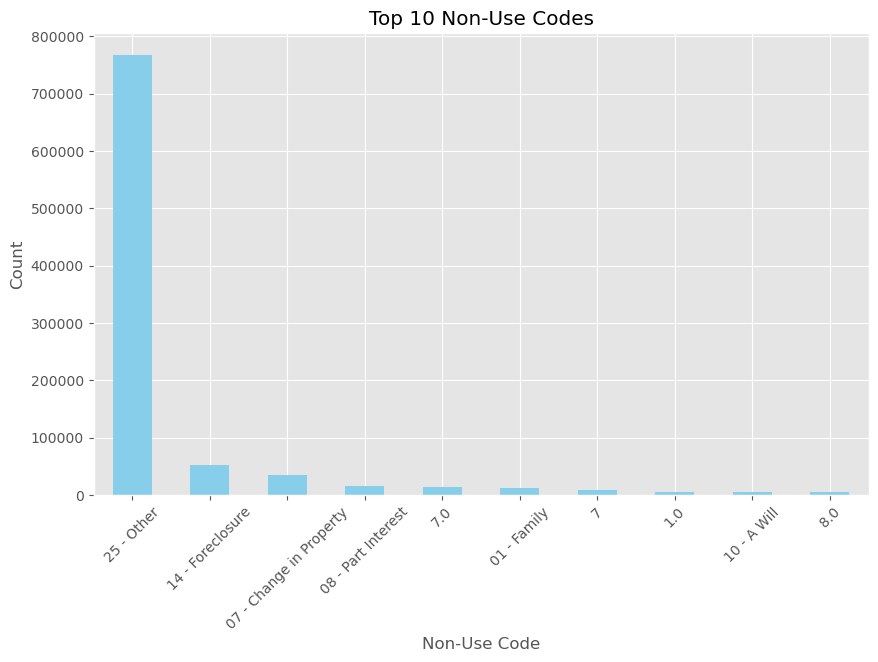

In [117]:
# To visualize the unique non-use codes in a chart
# Get unique non-use codes and their counts
non_use_codes = merged_data['Non Use Code'].value_counts()

# Limit the number of codes displayed (e.g., top 10)
top_n_codes = non_use_codes.head(10)

# Plot bar chart with adjusted figure size
plt.figure(figsize=(10, 6))
top_n_codes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Non-Use Codes')
plt.xlabel('Non-Use Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Major Categories**:

Among the top non-use codes, "14 - Foreclosure" and "07 - Change in Property" stand out, with 52,442 and 34,245 occurrences, respectively.
"14 - Foreclosure" likely indicates properties undergoing foreclosure proceedings, which can influence their market value and sale conditions.
"07 - Change in Property" signifies alterations in property characteristics or usage, potentially impacting its assessed value and legal status.
***(Foreclosure proceedings refer to the legal process through which a lender takes possession of a property when the borrower fails to make mortgage payments as agreed. It involves the lender seeking to sell the property in order to recover the outstanding loan amount.)***

- "Part Interest" typically refers to a situation where an individual or entity has a partial ownership or stake in a property rather than owning it outright. This can occur in various scenarios, such as joint ownership between multiple parties, shared ownership with a business entity, or fractional ownership arrangements.

**Less Common Codes**:

While several non-use codes have substantial representation, some codes occur infrequently. For instance, codes like "38.0," "48.0," "68.0," "33," and "75" each appear only once in the dataset.
These less common codes may pertain to unique circumstances or anomalies in property transactions, warranting further investigation to understand their implications.

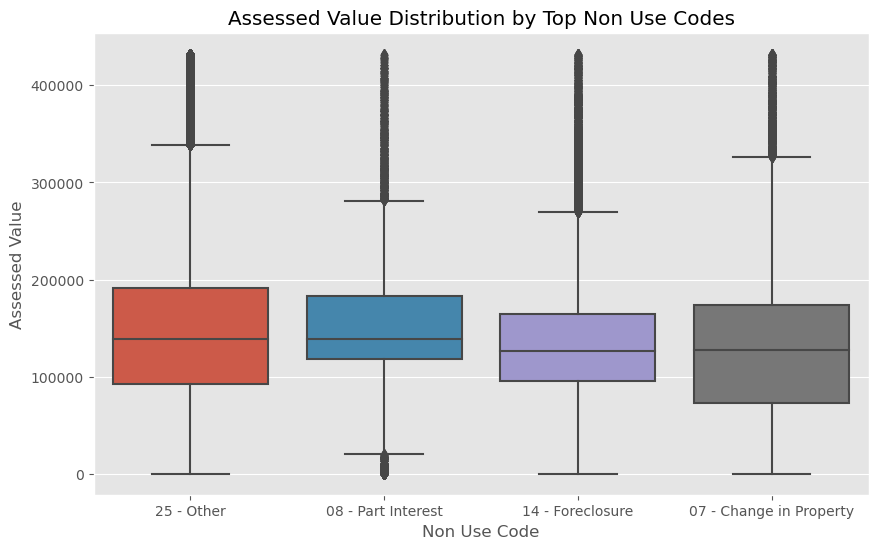

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the top 4 non-use codes
top_n_codes = 4
top_non_use_codes = merged_data['Non Use Code'].value_counts().head(top_n_codes).index

# Filter the data to include only the top 4 non-use codes
filtered_data = merged_data[merged_data['Non Use Code'].isin(top_non_use_codes)]

# Set figure size
plt.figure(figsize=(10, 6))

# Plot boxplot
sns.boxplot(x='Non Use Code', y='Assessed Value', data=filtered_data)

# Add labels and title
plt.title('Assessed Value Distribution by Top Non Use Codes')
plt.xlabel('Non Use Code')
plt.ylabel('Assessed Value')

# Show plot
plt.show()

1.Impact on Assessed Values: The chart illustrates how each non-use code category is linked to a distinct range of assessed values. For example, the box plots for each code category display the variability in assessed values, indicating how these codes can impact the valuation process and contribute to the diversity of assessed values observed in the market.

2.Influence on Sales Transactions: By analyzing the distribution of assessed values across different non-use codes, stakeholders can gain insights into how these codes may affect sales transactions. Properties with certain non-use codes may command higher or lower prices based on their characteristics, as reflected in the assessed value distribution shown in the chart.

3.Market Trends and Patterns: The chart helps identify trends and patterns in the relationship between non-use codes, assessed values, and sales transactions. It provides a visual representation of how different non-use codes are associated with varying assessed values, highlighting the importance of considering these codes when assessing property values and analyzing market trends.

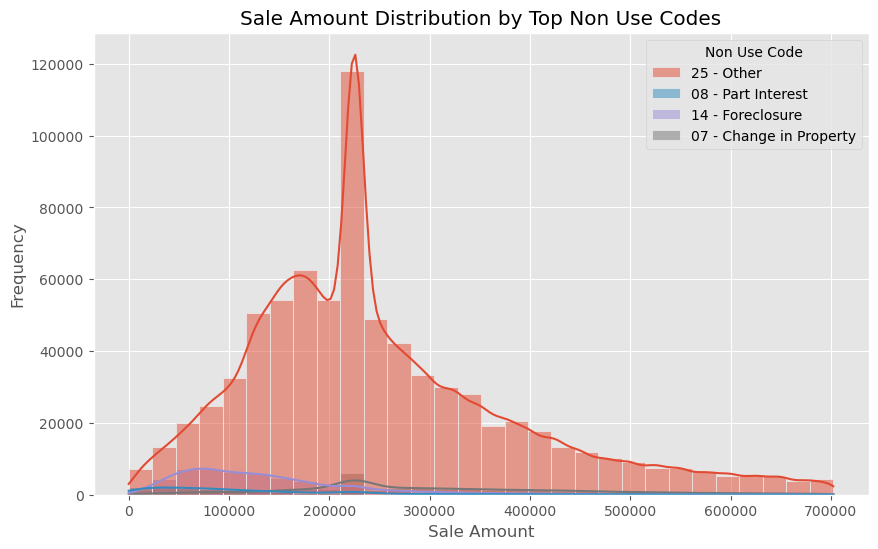

In [119]:
# To analyze sale amounts for properties with and without non-use codes:

# Determine the top N non-use codes
top_n_codes = 4
top_non_use_codes = merged_data['Non Use Code'].value_counts().head(top_n_codes).index

# Filter the data to include only the top N non-use codes
filtered_data = merged_data[merged_data['Non Use Code'].isin(top_non_use_codes)]

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE and color encoded by Non Use Code
sns.histplot(data=filtered_data, x='Sale Amount', hue='Non Use Code', kde=True, bins=30)

# Add labels and title
plt.title('Sale Amount Distribution by Top Non Use Codes')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')

# Show plot
plt.show()

**Non-Use Codes and Sale Amounts:**

25 - Other: This non-use code shows a varied distribution of sale amounts, ranging from lower to higher values. Properties categorized under "Other" exhibit diverse sale amounts, reflecting the range of property types or conditions captured by this code.

08 - Part Interest: Properties with "Part Interest" non-use code demonstrate a distribution of sale amounts with a notable concentration within a specific range. This code likely indicates properties with shared ownership or partial interests, influencing the sale amounts observed.

14 - Foreclosure: The distribution of sale amounts for properties under the "Foreclosure" code shows a distinct pattern, potentially reflecting discounted prices or specific market conditions associated with foreclosure properties.

07 - Change in Property: Properties categorized under "Change in Property" display varying sale amounts, suggesting fluctuations in property values due to changes in ownership, renovations, or other property alterations.

**Analyze how these codes influence assessed values and sales transactions, identifying patterns and potential areas for policy refinement**.

In [120]:
# Summary statistics
non_use_codes_assessed_sales = merged_data.groupby('Non Use Code')[['Assessed Value', 'Sale Amount']].describe()
non_use_codes_assessed_sales

Assessed Value                                          \
                       count           mean            std       min   
Non Use Code                                                           
1.0                   6057.0  112745.365032   70202.940972       0.0   
2.0                     69.0  118806.637681   88354.126992       0.0   
3.0                   1718.0  112928.140861   95110.605226       0.0   
4.0                    322.0  137163.555901  101687.251132       0.0   
5.0                     25.0  115632.000000  105653.250739    5320.0   
...                      ...            ...            ...       ...   
75                       1.0  180740.000000            NaN  180740.0   
8                     3480.0  114657.516667   78533.830622       0.0   
88                       1.0   43400.000000            NaN   43400.0   
9                       21.0   41303.809524   30754.709961       0.0   
Single Family            3.0   99056.666667   78081.999419    9870.0   

                                                      Sale Amount  \
                    25%       50%       75%       max       count   
Non Use Code                                                        
1.0             70350.0   97630.0  138390.0  432000.0      6057.0   
2.0             60550.0   95800.0  167790.0  343330.0        69.0   
3.0             40645.0   89963.5  138390.0  429900.0      1718.0   
4.0             64960.0  114500.0  183067.5  424400.0       322.0   
5.0             46970.0   85800.0  138390.0  415510.0        25.0   
...                 ...       ...       ...       ...         ...   
75             180740.0  180740.0  180740.0  180740.0         1.0   
8               63900.0   99825.0  138390.0  428190.0      3480.0   
88              43400.0   43400.0   43400.0   43400.0         1.0   
9               17200.0   37420.0   56000.0  120300.0        21.0   
Single Family   71035.0  132200.0  143650.0  155100.0         3.0   

                                                                           \
                        mean            std      min        25%       50%   
Non Use Code                                                                
1.0            145062.985471  112815.389622      0.0   62000.00  128000.0   
2.0             58844.840580  101974.073991      0.0       0.00   13500.0   
3.0            156896.520373  148290.533399      0.0   50000.00  102450.0   
4.0            181234.118012  177049.201361      0.0   22750.00  133000.0   
5.0            168594.520000  159642.275732   4000.0   25000.00  150000.0   
...                      ...            ...      ...        ...       ...   
75              69900.000000            NaN  69900.0   69900.00   69900.0   
8              103366.951724  111468.723557      0.0   28703.75   66000.0   
88              70000.000000            NaN  70000.0   70000.00   70000.0   
9               35366.809524   29469.603544   2500.0   17500.00   27600.0   
Single Family  160666.666667  117925.117483  27000.0  116000.00  205000.0   

                                    
                     75%       max  
Non Use Code                        
1.0            200000.00  700000.0  
2.0             75000.00  600000.0  
3.0            225000.00  702000.0  
4.0            283977.00  700000.0  
5.0            225000.00  655000.0  
...                  ...       ...  
75              69900.00   69900.0  
8              133120.75  700000.0  
88              70000.00   70000.0  
9               47000.00  137000.0  
Single Family  227500.00  250000.0  

[106 rows x 16 columns]

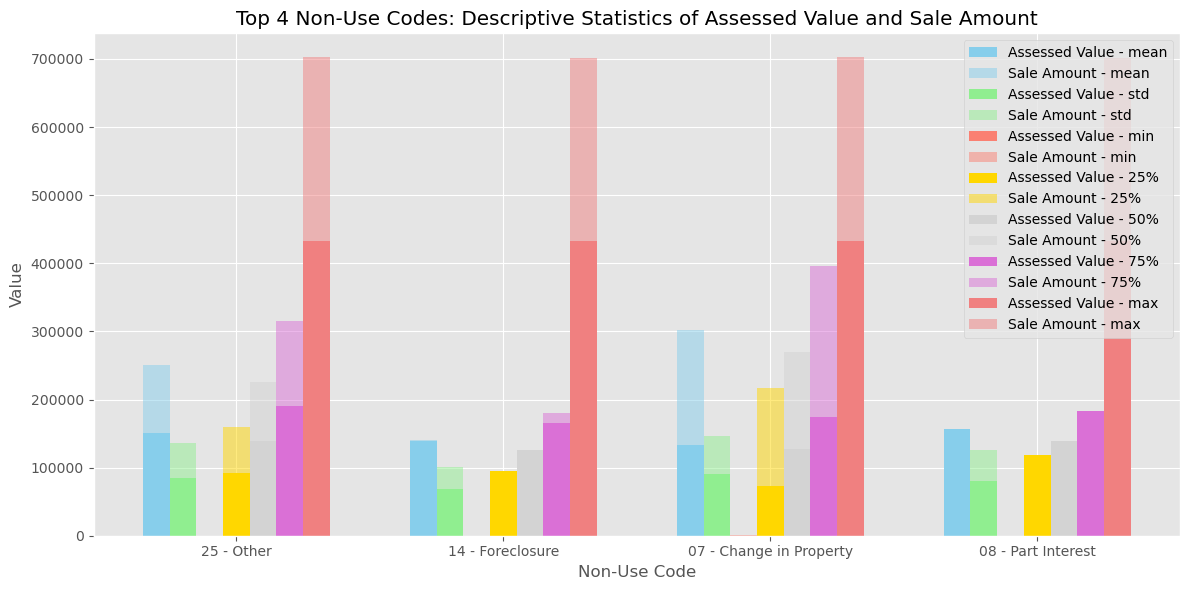

In [121]:
# Define the number of top non-use codes to include
top_n_codes = 4

# Select the top N non-use codes based on count of properties
top_codes = non_use_codes_assessed_sales['Assessed Value']['count'].nlargest(top_n_codes).index

# Filter the DataFrame to include only the top N non-use codes
top_non_use_codes_assessed_sales = non_use_codes_assessed_sales.loc[top_codes]

# Plotting
plt.figure(figsize=(12, 6))

# Define the x-axis labels (top non-use codes)
x_labels = top_non_use_codes_assessed_sales.index.astype(str)

# Define the descriptive statistics to plot
statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Define colors for each statistic
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightgrey', 'orchid', 'lightcoral']

# Define width of each bar
bar_width = 0.1

# Iterate over each descriptive statistic and plot a grouped bar for assessed value and sale amount
for i, stat in enumerate(statistics):
    plt.bar([pos + i * bar_width for pos in range(len(x_labels))], 
            top_non_use_codes_assessed_sales[('Assessed Value', stat)], 
            width=bar_width, 
            color=colors[i], 
            label=f'Assessed Value - {stat}')
    
    plt.bar([pos + i * bar_width for pos in range(len(x_labels))], 
            top_non_use_codes_assessed_sales[('Sale Amount', stat)], 
            width=bar_width, 
            color=colors[i], 
            alpha=0.5, 
            label=f'Sale Amount - {stat}')

# Add labels and title
plt.title(f'Top {top_n_codes} Non-Use Codes: Descriptive Statistics of Assessed Value and Sale Amount')
plt.xlabel('Non-Use Code')
plt.ylabel('Value')
plt.xticks([pos + 3 * bar_width for pos in range(len(x_labels))], x_labels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Summary**

**Variability in Assessed Values**:

The standard deviation values indicate the variability or dispersion of assessed values within each non-use code category. Higher standard deviations suggest greater variability in assessed values, while lower values indicate relatively less variability.

**Comparison Across Non-Use Codes**:

Non-use codes such as 1.0, 3.0, and 4.0 have larger counts of properties, with varying mean assessed values and sale amounts. These non-use codes may represent different property classifications or conditions, leading to diverse valuation outcomes.

## 6
Assessor and OPM Remarks Analyze remarks provided by assessors and the Office of Policy 
and Management (OPM) to identify factors influencing assessment decisions and potential areas 
for improvement.

**What is OPM remarks**

- OPM remarks refer to comments or notes provided by the Office of Policy and Management (OPM) in the context of property sales transactions. These remarks typically accompany sales data and provide additional information about the circumstances or conditions surrounding each sale.

In [122]:
merged_data["OPM remarks"].nunique()

4825

In [123]:
merged_data["OPM remarks"].unique()

array(['GOOD SALE PER MLS', 'GAS STATION',
       'RENOVATED ONE UNIT PER MLS - SEE PREVIOUS SALE #201127', ...,
       'INCLUDES #19158',
       'TOTAL RENOVATION PER MLS - SEE PREVIOUS SALE #1900075',
       'PER MLS CLOSING PRICE = $1,145,000'], dtype=object)

In [124]:
OPM_remarks_counts = merged_data["OPM remarks"].value_counts()
OPM_remarks_counts

OPM remarks
GOOD SALE PER MLS                                                   988056
NO MLS                                                                 500
NEW CONSTRUCTION                                                       345
SHORT SALE PER MLS                                                     326
TOTAL RENOVATION PER MLS                                               316
                                                                     ...  
REMODELED PER MLS - SEE PREVIOUS SALE #170076                            1
REO SALE - CASH ONLY SOLD AS IS                                          1
TWO SALES - ALSO SEE #1700209                                            1
NOT A VALID SALE PER TOWN SITE AND PER MLS SALE PRICE = $345,000         1
PER MLS CLOSING PRICE = $1,145,000                                       1
Name: count, Length: 4825, dtype: int64

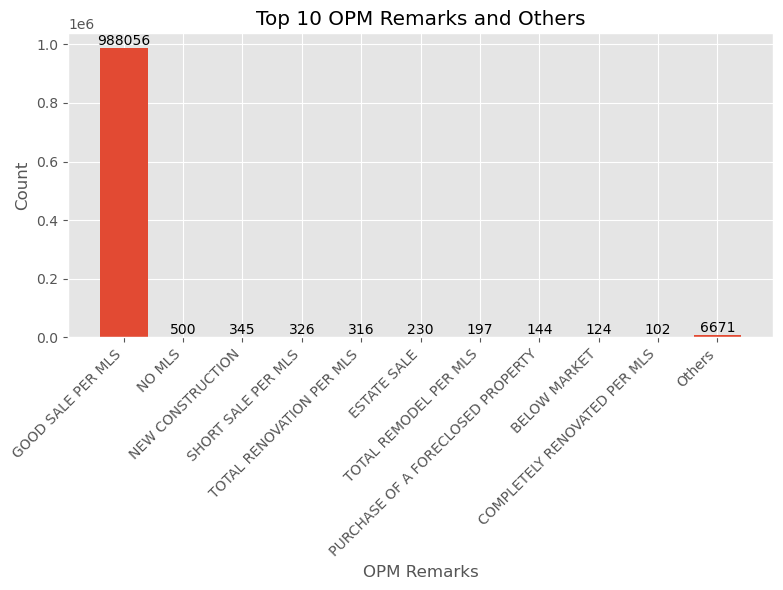

In [125]:
# Set the number of top remarks to display
top_n_remarks = 10

# Get the top N most frequent OPM remarks
top_opm_remarks = OPM_remarks_counts.head(top_n_remarks)

# Combine the counts of the remaining remarks into an "Others" category
other_count = OPM_remarks_counts[top_n_remarks:].sum()
top_opm_remarks['Others'] = other_count

# Plot the modified data
plt.figure(figsize=(8, 6))
bars = plt.bar(top_opm_remarks.index, top_opm_remarks.values)
plt.title(f'Top {top_n_remarks} OPM Remarks and Others')
plt.xlabel('OPM Remarks')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add counts as text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Summary:**

1.Decision Influence: OPM remarks provided by assessors can significantly impact assessment decisions by providing insights into the property's condition, market status, or special circumstances affecting its value.

2.Assessment Context: Remarks like "NEW CONSTRUCTION" or "COMPLETELY RENOVATED PER MLS" indicate property improvements that can positively influence assessments, while remarks like "BELOW MARKET" or "SHORT SALE PER MLS" may suggest challenges affecting value.

3.Market Insight: OPM remarks offer assessors valuable market insights, helping them consider external factors impacting property values and make informed decisions during the assessment process.

**Areas for Improvement in OPM Utilization:**

- Consistency: Ensuring consistent and standardized use of OPM remarks across assessments can enhance accuracy and comparability in property valuations.

- Detailing: Providing detailed and specific OPM remarks can offer a clearer understanding of the factors influencing property values, leading to more precise assessments.

- Training: Continuous training on OPM remark utilization can improve assessors' ability to interpret and apply remarks effectively, enhancing the assessment process's quality and reliability.

- Technology Integration: Leveraging technology to streamline OPM remark recording and analysis can optimize assessment workflows and facilitate data-driven decision-making.